# Magnetização X Temp | Calor específico X Temp | Entropia X Temp 

In [1]:
from math import tanh, sinh, log
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d


kb = 0.086    # em meV/K
mub = 0.05788 # em meV/T
R = 8.316     # Gas constant in J/(mol.K)

Bext = 0.500
n = 1  # Número de íons por célula
gj = 2  # Fator de landé
j = 7 / 2  # Definindo número quântico j.
p = 18  # Número de primeiros vizinhos próximos 
Tc = 28 # Temperatura crítica
Jo = (3*kb*Tc)/(2*p*((gj)**2)*j*(j+1)) # Parâmetro de troca, não precisa definir já que tá de forma implicita na temperatura crítica e  plambda
Ms = n * gj * j * mub # Magnetização de saturação
plambda = (3*kb*Tc)/(n*(mub**2)*((gj)**2)*j*(j+1)) # Intensidade do campo molecular
                                                                   

Mo = Ms

listaT = []
listaM = []
listaC = [] 
listaS = []

dT=0.01

for T in np.arange(1,49,0.1):
    y = (gj * mub * j * (plambda * Mo+Bext)) / (kb * T)
    M = Ms * (((2 * j + 1) / (2 * j)) * (1 / (tanh(((2 * j + 1) / (2 * j)) * y))) - (1 / (2 * j)) * (
                1 / tanh(y / (2 * j))))
    while abs(M - Mo) > 10e-5:
        Mo = M
        y = (gj * mub * j * (plambda * Mo + Bext)) / (kb * T)
        M = Ms * (((2 * j + 1) / (2 * j)) * (1 / (tanh(((2 * j + 1) / (2 * j)) * y))) - (1 / (2 * j)) * (
                    1 / tanh(y / (2 * j))))
    S = R*(log(sinh(((2*j+1)/(2 * j)) * y)) - log(sinh(y / (2 * j))) - y * (((2 * j + 1) / (2 * j)) * (1 / (tanh(((2 * j + 1) / (2 * j)) * y))) - (1 / (2 * j)) * (
                    1 / tanh(y / (2 * j)))))
    listaM.append(M/mub)
    listaS.append(S)
    listaT.append(T)

temp = np.array(listaT)
S = np.array(listaS)
C = np.gradient(S,dT)
C = temp*C

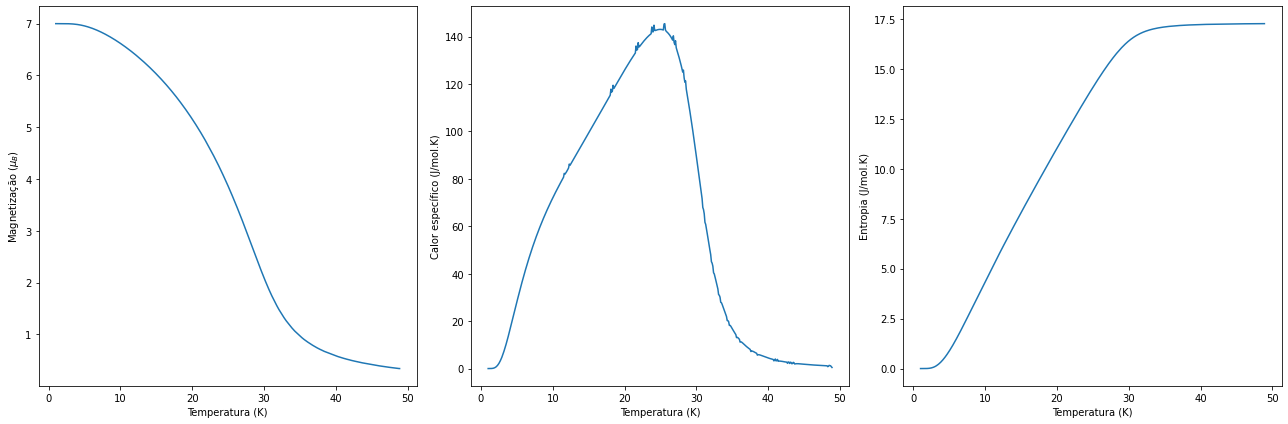

In [2]:
f, axs = plt.subplots(ncols=3,figsize=(18,6))
axs[0].plot(listaT,listaM)
axs[0].set_xlabel("Temperatura (K)")
axs[0].set_ylabel("Magnetização ($\mu_B$)")
axs[1].plot(listaT,C)
axs[1].set_xlabel("Temperatura (K)")
axs[1].set_ylabel("Calor específico (J/mol.K)")
axs[2].plot(temp,S)
axs[2].set_xlabel("Temperatura (K)")
axs[2].set_ylabel("Entropia (J/mol.K)")

f.tight_layout()
plt.show()

# Magnetização X Campo Externo

In [3]:
#Lendo Dados

dados_1 = pd.read_excel('F:\\Aulas\\TCC\\Dados\\MagXH(T).xlsx',header=None,sheet_name="Sheet1")
dados_1.columns=['H','M'] 

dados_2 = pd.read_excel('F:\\Aulas\\TCC\\Dados\\MagXH(T).xlsx',header=None,sheet_name="Sheet2")
dados_2.columns=['H','M'] 

dados_3 = pd.read_excel('F:\\Aulas\\TCC\\Dados\\MagXH(T).xlsx',header=None,sheet_name="Sheet3")
dados_3.columns=['H','M'] 

dados_4 = pd.read_excel('F:\\Aulas\\TCC\\Dados\\MagXH(T).xlsx',header=None,sheet_name="Sheet4")
dados_4.columns=['H','M'] 

dados_5 = pd.read_excel('F:\\Aulas\\TCC\\Dados\\MagXH(T).xlsx',header=None,sheet_name="Sheet5")
dados_5.columns=['H','M'] 

dados_6 = pd.read_excel('F:\\Aulas\\TCC\\Dados\\MagXH(T).xlsx',header=None,sheet_name="Sheet6")
dados_6.columns=['H','M'] 

dados_7 = pd.read_excel('F:\\Aulas\\TCC\\Dados\\MagXH(T).xlsx',header=None,sheet_name="Sheet7")
dados_7.columns=['H','M'] 

dados_8 = pd.read_excel('F:\\Aulas\\TCC\\Dados\\MagXH(T).xlsx',header=None,sheet_name="Sheet8")
dados_8.columns=['H','M'] 

dados_9 = pd.read_excel('F:\\Aulas\\TCC\\Dados\\MagXH(T).xlsx',header=None,sheet_name="Sheet9")
dados_9.columns=['H','M'] 

dados_10 = pd.read_excel('F:\\Aulas\\TCC\\Dados\\MagXH(T).xlsx',header=None,sheet_name="Sheet10")
dados_10.columns=['H','M'] 

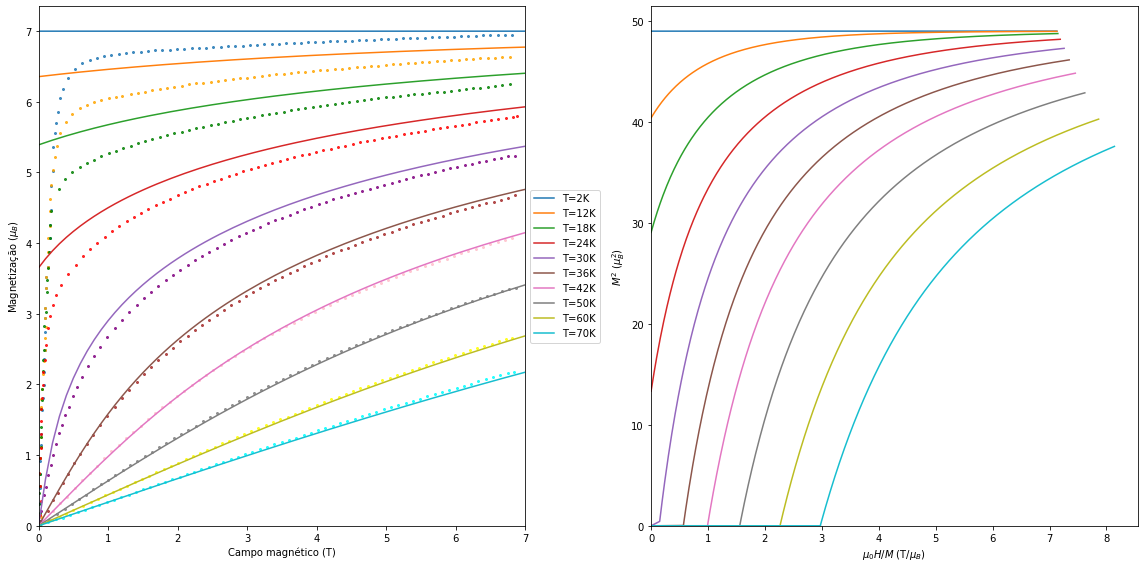

In [4]:
listaBext = []
listaM = []

Mo=Ms

fig, axis = plt.subplots(ncols=2,figsize=(16,8))
for T in 2, 12, 18, 24, 30, 36, 42, 50, 60, 70:
  listaBext = []
  listaM = []
  for Bext in np.arange(0, 50,0.1):
      y = (gj * mub * j * (plambda * Mo+Bext)) / (kb * T)
      M2 = Ms * (((2 * j + 1) / (2 * j)) * (1 / (tanh(((2 * j + 1) / (2 * j)) * y))) - (1 / (2 * j)) * (
                1 / tanh(y / (2 * j))))
      while abs(M2 - Mo) > 0.00001:
          Mo = M2
          y = (gj * mub * j * (plambda * Mo + Bext)) / (kb * T)
          M2  = Ms * (((2 * j + 1) / (2 * j)) * (1 / (tanh(((2 * j + 1) / (2 * j)) * y))) - (1 / (2 * j)) * (
                    1 / tanh(y / (2 * j))))
      listaM.append(M2/mub)
      listaBext.append(Bext)
  axis[0].plot(listaBext,listaM,label="T="+str(T)+"K")
  axis[1].plot(np.array(listaBext)/np.array(listaM),np.array(listaM)**2,label="T="+str(T)+"K")
    
fc = 0.179*0.419 #convertendo mub p J/Kg T

axis[0].scatter(dados_10['H'],dados_10['M']*fc,alpha=0.8,s=4,color = 'aqua')
axis[0].scatter(dados_9['H'],dados_9['M']*fc,alpha=0.8,s=4)
axis[0].scatter(dados_8['H'],dados_8['M']*fc,alpha=0.8,s=4,color ='orange')
axis[0].scatter(dados_7['H'],dados_7['M']*fc,alpha=0.8,s=4,color='green')
axis[0].scatter(dados_6['H'],dados_6['M']*fc,alpha=0.8,s=4,color='red')
axis[0].scatter(dados_5['H'],dados_5['M']*fc,alpha=0.8,s=4,color='purple')
axis[0].scatter(dados_4['H'],dados_4['M']*fc,alpha=0.8,s=4,color='brown')
axis[0].scatter(dados_3['H'],dados_3['M']*fc,alpha=0.8,s=4,color='pink')
axis[0].scatter(dados_2['H'],dados_2['M']*fc,alpha=0.8,s=4,color='grey')
axis[0].scatter(dados_1['H'],dados_1['M']*fc,alpha=0.8,s=4,color='yellow')


axis[0].set_xlabel("Campo magnético (T)")
axis[0].set_ylabel("Magnetização ($\mu_B$)")
axis[0].set_xlim(0,7)
axis[0].set_ylim(0,)
axis[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axis[1].set_xlabel("$\mu_0 H/M$ (T/$\mu_B$)")
axis[1].set_ylabel("$M^2$ ($\mu_B^2$)")
axis[1].set_xlim(0,)
axis[1].set_ylim(0,)

plt.tight_layout()

# Variação entropia magnética X T

In [5]:
#Lendo dados

dados_7T = pd.read_excel('F:\\Aulas\\TCC\\Dados\\DeltaS_GdNi4Al(Mag).xlsx',header=None,sheet_name="Sheet1")
dados_7T.columns=['T','S'] 

dados_5T = pd.read_excel('F:\\Aulas\\TCC\\Dados\\DeltaS_GdNi4Al(Mag).xlsx',header=None,sheet_name="Sheet2")
dados_5T.columns=['T','S'] 

dados_3T = pd.read_excel('F:\\Aulas\\TCC\\Dados\\DeltaS_GdNi4Al(Mag).xlsx',header=None,sheet_name="Sheet3")
dados_3T.columns=['T','S'] 

dados_1T = pd.read_excel('F:\\Aulas\\TCC\\Dados\\DeltaS_GdNi4Al(Mag).xlsx',header=None,sheet_name="Sheet4")
dados_1T.columns=['T','S'] 

In [6]:
kb = 0.086    # em meV/K
mub = 0.05788 # em meV/T
R = 8.316     # Gas constant in J/(mol.K)

n = 1  # Número de íons por célula
gj = 2  # Fator de landé
j = 7 / 2  # Definindo número quântico j.
p = 18  # Número de vizinhos próximos - n sei se ta certo
Tc = 28 # Temperatura crítica
Jo = (3*kb*Tc)/(2*p*((gj)**2)*j*(j+1)) # Parâmetro de troca

Ms = n * gj * j * mub # Magnetização de saturação
plambda = (3*kb*Tc)/(n*(mub**2)*((gj)**2)*j*(j+1)) # Intensidade do campo molecular

# gdni4al

Mo = Ms

listaT = [[],[],[],[],[]]
listaM = [[],[],[],[],[]]
listaS = [[],[],[],[],[]]
listaBeI = [[0,1,3,5,7],[0,1,2,3,4]]

dT=0.01
for i in 0,1,2,3,4:
    Bext = listaBeI[0][i]
    for T in np.arange(1,69,0.1):
        y = (gj * mub * j * (plambda * Mo+Bext)) / (kb * T)
        M = Ms * (((2 * j + 1) / (2 * j)) * (1 / (tanh(((2 * j + 1) / (2 * j)) * y))) - (1 / (2 * j)) * (
                    1 / tanh(y / (2 * j))))
        while abs(M - Mo) > 10e-5:
            Mo = M
            y = (gj * mub * j * (plambda * Mo + Bext)) / (kb * T)
            M = Ms * (((2 * j + 1) / (2 * j)) * (1 / (tanh(((2 * j + 1) / (2 * j)) * y))) - (1 / (2 * j)) * (
                        1 / tanh(y / (2 * j))))
        S = R*(log(sinh(((2*j+1)/(2 * j)) * y)) - log(sinh(y / (2 * j))) - y * (((2 * j + 1) / (2 * j)) * (1 / (tanh(((2 * j + 1) / (2 * j)) * y))) - (1 / (2 * j)) * (
                        1 / tanh(y / (2 * j)))))
        listaM[i].append(M/mub)
        listaS[i].append(S)
        listaT[i].append(T)


In [7]:
arrayS = np.array(listaS)/0.419
arrayT = np.array(listaT)

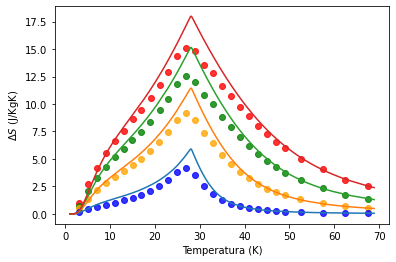

In [8]:
for j in 0,1,2,3:
    plt.plot(arrayT[j],-arrayS[j+1]+arrayS[0])
plt.scatter(dados_7T['T'],dados_7T['S'],color='red',alpha=0.8)    
plt.scatter(dados_5T['T'],dados_5T['S'],color='green',alpha=0.8)   
plt.scatter(dados_3T['T'],dados_3T['S'],color='orange',alpha=0.8)   
plt.scatter(dados_1T['T'],dados_1T['S'],color='blue',alpha=0.8)   
plt.xlabel("Temperatura (K)")
plt.ylabel("$\Delta S$ (J/KgK)") 
plt.rcParams["figure.figsize"] = (13,10)

# Variação da temperatura adiabática

In [9]:
from debye import entropy,molar_heat_capacity_v
from scipy.constants import gas_constant

N = 6
DebyeT = 200

#temp = np.arange(1,69,0.1)
temp = 1
SDebye = entropy(temp, DebyeT, N)
np.finfo(float).eps

2.220446049250313e-16

In [10]:
temp=np.arange(1,69,0.1)
TD=200
N=6

S=[]
Cv=[]
for t in temp:
    S.append(entropy(t,TD,N))
    Cv.append(molar_heat_capacity_v(t,TD,N))
S = np.array(S)
Cv= np.array(Cv)


In [11]:
#lendo dados

dados_D7T = pd.read_excel('F:\\Aulas\\TCC\\Dados\\DeltaT.xlsx',header=None,sheet_name="Sheet1")
dados_D7T.columns=['T','DT'] 

dados_D5T = pd.read_excel('F:\\Aulas\\TCC\\Dados\\DeltaT.xlsx',header=None,sheet_name="Sheet2")
dados_D5T.columns=['T','DT'] 

dados_D3T = pd.read_excel('F:\\Aulas\\TCC\\Dados\\DeltaT.xlsx',header=None,sheet_name="Sheet3")
dados_D3T.columns=['T','DT'] 

dados_D1T = pd.read_excel('F:\\Aulas\\TCC\\Dados\\DeltaT.xlsx',header=None,sheet_name="Sheet4")
dados_D1T.columns=['T','DT']

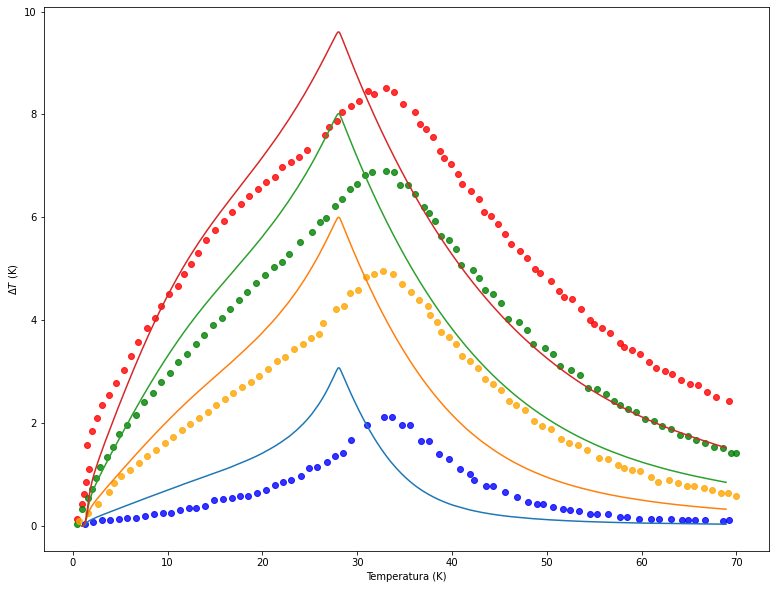

In [14]:
for j in 1,2,3,4:
    x0 = arrayS[0,:] + S
    y0 = arrayT[0,:]
    x1 = arrayS[j,:] + S
    
    f0 = interp1d(x0,y0)
    f1 = interp1d(x1,y0,fill_value='extrapolate')
    
    t0 = y0
    t1 = f1(x0)
    
    deltaT = t1-t0
    plt.plot(temp,deltaT)
 
plt.scatter(dados_D7T['T'],dados_D7T['DT'],color='red',alpha=0.8)    
plt.scatter(dados_D5T['T'],dados_D5T['DT'],color='green',alpha=0.8)   
plt.scatter(dados_D3T['T'],dados_D3T['DT'],color='orange',alpha=0.8)   
plt.scatter(dados_D1T['T'],dados_D1T['DT'],color='blue',alpha=0.8)

plt.xlabel("Temperatura (K)")
plt.ylabel("$\Delta T$ (K)") 
plt.rcParams["figure.figsize"] = (13,10)